In [8]:
# Importing necessary modules from Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator  # Updated simulator backend
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Enables inline plotting in Jupyter notebooks
%matplotlib inline


In [9]:
# Define the list to search
myList = [5, 4, 6, 9, 1, 2, 3, 7, 8, 0]

# Oracle function that returns True if the number is the winning number
def oracle(number):
    winningNumber = 8
    return number == winningNumber

# Perform linear search using a for loop
for index, number in enumerate(myList):
    if oracle(number):
        print(f"Winning number index: {index}")
        print(f"Execution count: {index + 1}")
        break


Winning number index: 8
Execution count: 9


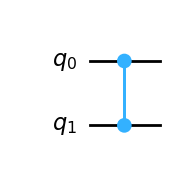

In [10]:
# Create an oracle that flips the phase of |11⟩
oracleCircuit = QuantumCircuit(2, name='oracleCircuit')
oracleCircuit.cz(0, 1)  # Apply a controlled-Z gate to mark |11⟩
oracleGate = oracleCircuit.to_gate()
oracleGate.name = "Oracle"  # Rename the gate for clarity
oracleCircuit.draw(output='mpl');


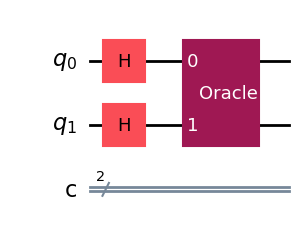

In [11]:
# Create the main quantum circuit
mainCircuit = QuantumCircuit(2, 2)

# Apply Hadamard gates to both qubits to create a superposition
mainCircuit.h([0, 1])

# Apply the oracle gate
mainCircuit.append(oracleGate, [0, 1])
mainCircuit.draw(output='mpl');


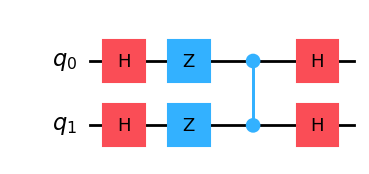

In [12]:
# Build the diffusion (inversion-about-the-mean) operator
reflectionCircuit = QuantumCircuit(2, name="reflectionCircuit")
reflectionCircuit.h([0, 1])       # Apply Hadamard gates
reflectionCircuit.z([0, 1])       # Apply Pauli-Z gates
reflectionCircuit.cz(0, 1)        # Apply controlled-Z to invert the target
reflectionCircuit.h([0, 1])       # Final Hadamard gates

# Convert to gate so it can be reused
reflectionGate = reflectionCircuit.to_gate()
reflectionGate.name = "Diffusion"
reflectionCircuit.draw(output='mpl');


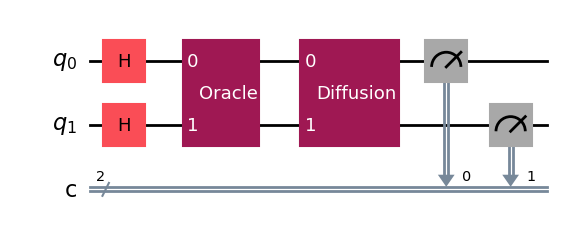

In [13]:
# Append the diffusion gate to the main circuit
mainCircuit.append(reflectionGate, [0, 1])

# Measure the qubits to classical bits
mainCircuit.measure([0, 1], [0, 1])

# Draw the complete Grover circuit
mainCircuit.draw(output='mpl');


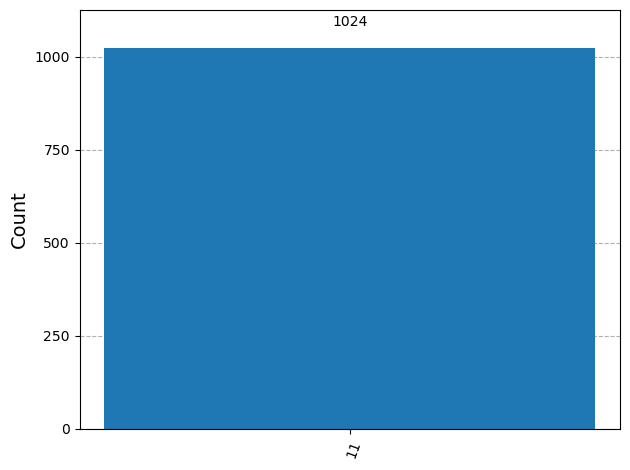

In [14]:
# Use AerSimulator to run the quantum circuit
simulator = AerSimulator()

# Transpile the circuit for the simulator backend
compiled_circuit = transpile(mainCircuit, simulator)

# Execute the circuit and get results
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Extract the result counts and plot them
counts = result.get_counts()
plot_histogram(counts);
